In [12]:
#데이터 로드
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


file_path = "./heart.csv"
df = pd.read_csv(file_path)

In [14]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

In [18]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['target'], axis = 1) 
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 타겟 원핫 인코딩
y_train_encoded = to_categorical(y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8689


In [24]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 400}
최고 정확도: 0.8181122448979593
튜닝 후 정확도: 0.8524590163934426


In [25]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5213 - loss: 0.7219 - val_accuracy: 0.6531 - val_loss: 0.6030
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.6034 - val_accuracy: 0.7347 - val_loss: 0.5257
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.5304 - val_accuracy: 0.8163 - val_loss: 0.4672
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.4769 - val_accuracy: 0.7959 - val_loss: 0.4375
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.4581 - val_accuracy: 0.7755 - val_loss: 0.4332
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8017 - loss: 0.4388 - val_accuracy: 0.7959 - val_loss: 0.4276
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8131 - loss: 0.4330 - val_accuracy: 0.7959 - val_loss: 0.4251
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4169 - val_accuracy: 0.7959 - val_loss: 0.4163
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - loss: 0.2993 - val_accuracy: 0.7755 - val_loss: 0.4147
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8867 - loss: 0.2952 - val_accuracy: 0.7959 - val_loss: 0.4132
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2653 - val_accuracy: 0.7959 - val_loss: 0.4043
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.2912 - val_accuracy: 0.7959 - val_loss: 0.3871
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.2736 - val_accuracy: 0.7959 - val_loss: 0.3845
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.2430 - val_accuracy: 0.7959 - val_loss: 0.3853
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.2609 - val_accuracy: 0.7959 - val_loss: 0.3817
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8658 - loss: 0.2644 - val_accuracy: 0.8571 - val_loss: 0.3665
Epoch 9/

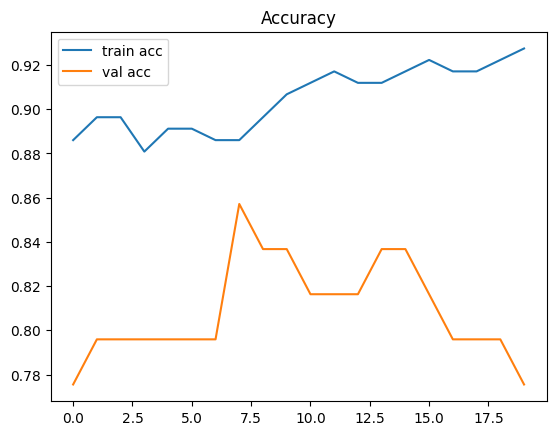

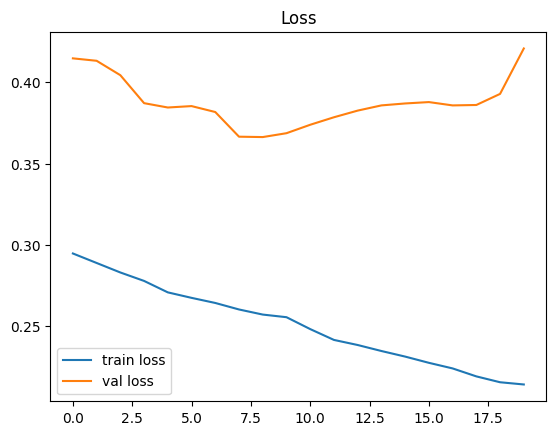

In [27]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

# X_train을 DataFrame으로 유지
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 모델 학습
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8197


In [36]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(3, 10), 'min_samples_split': randint(2, 10)}

random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring="accuracy")
random_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", random_search.best_params_)
print("최고 정확도:", random_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'max_depth': 3, 'min_samples_split': 6}
최고 정확도: 0.7602040816326531
튜닝 후 정확도: 0.8524590163934426


In [38]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[23  6]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[24  5]
 [ 4 28]]


In [40]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)
# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5508 - loss: 0.6725 - val_accuracy: 0.8367 - val_loss: 0.5251
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7704 - loss: 0.5723 - val_accuracy: 0.8571 - val_loss: 0.4633
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.5136 - val_accuracy: 0.8571 - val_loss: 0.4253
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8197 - loss: 0.4581 - val_accuracy: 0.8571 - val_loss: 0.4045
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8250 - loss: 0.4344 - val_accuracy: 0.8776 - val_loss: 0.3901
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.4320 - val_accuracy: 0.8776 - val_loss: 0.3783
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.3819 - val_accuracy: 0.8571 - val_loss: 0.3754
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.3612 - val_accuracy: 0.8571 - val_loss: 0.3720
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8940 - loss: 0.2667 - val_accuracy: 0.8571 - val_loss: 0.3740
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8823 - loss: 0.2839 - val_accuracy: 0.8571 - val_loss: 0.3781
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8695 - loss: 0.2660 - val_accuracy: 0.8571 - val_loss: 0.3789
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8900 - loss: 0.2589 - val_accuracy: 0.8571 - val_loss: 0.3769
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.2676 - val_accuracy: 0.8571 - val_loss: 0.3727
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - loss: 0.2543 - val_accuracy: 0.8571 - val_loss: 0.3662
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8763 - loss: 0.3067 - val_accuracy: 0.8571 - val_loss: 0.3598
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8949 - loss: 0.2657 - val_accuracy: 0.8367 - val_loss: 0.3626
Epoch 9/

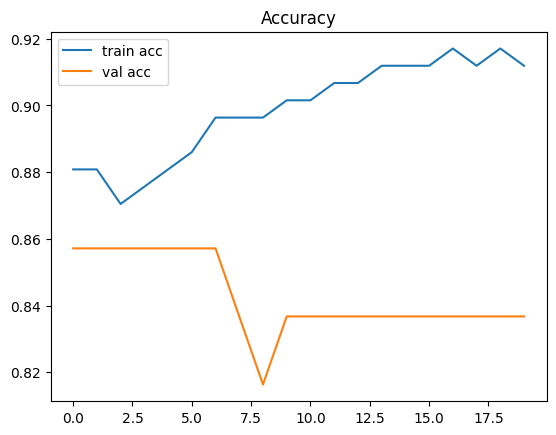

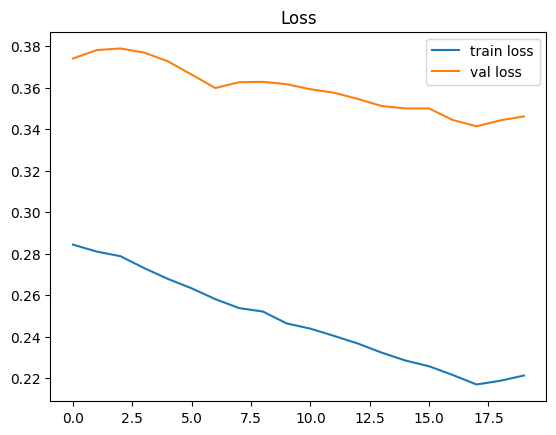

In [43]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC


# SVC 모델 학습
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8689


In [48]:
#하이퍼파라미터 튜닝
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
최고 정확도: 0.8224489795918368
튜닝 후 정확도: 0.8688524590163934


In [49]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[26  3]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[26  3]
 [ 5 27]]


In [52]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)
# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6078 - loss: 0.6515 - val_accuracy: 0.7959 - val_loss: 0.5686
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.5438 - val_accuracy: 0.8367 - val_loss: 0.5076
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4870 - val_accuracy: 0.7959 - val_loss: 0.4696
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8466 - loss: 0.4538 - val_accuracy: 0.8367 - val_loss: 0.4449
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.4214 - val_accuracy: 0.8163 - val_loss: 0.4296
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.4264 - val_accuracy: 0.7755 - val_loss: 0.4226
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.3497 - val_accuracy: 0.7755 - val_loss: 0.4149
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3552 - val_accuracy: 0.7959 - val_loss: 0.4040
Epoch 9

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.2729 - val_accuracy: 0.7755 - val_loss: 0.3930
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8923 - loss: 0.2786 - val_accuracy: 0.7755 - val_loss: 0.3968
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9063 - loss: 0.2565 - val_accuracy: 0.7755 - val_loss: 0.4096
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9041 - loss: 0.2652 - val_accuracy: 0.7755 - val_loss: 0.4072
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8993 - loss: 0.2777 - val_accuracy: 0.7347 - val_loss: 0.4107
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9211 - loss: 0.2361 - val_accuracy: 0.7551 - val_loss: 0.4113
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9321 - loss: 0.2274 - val_accuracy: 0.7551 - val_loss: 0.4129
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.2367 - val_accuracy: 0.7755 - val_loss: 0.4153
Epoch 9/

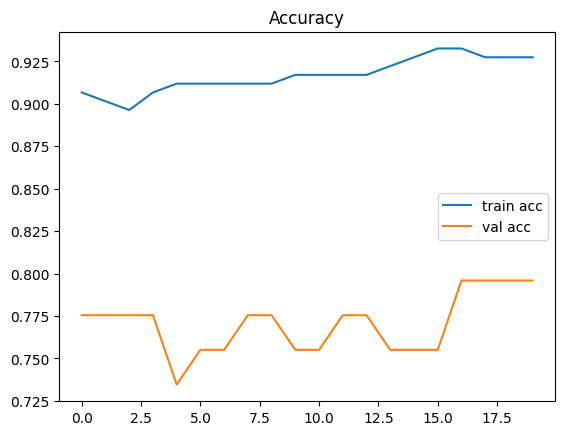

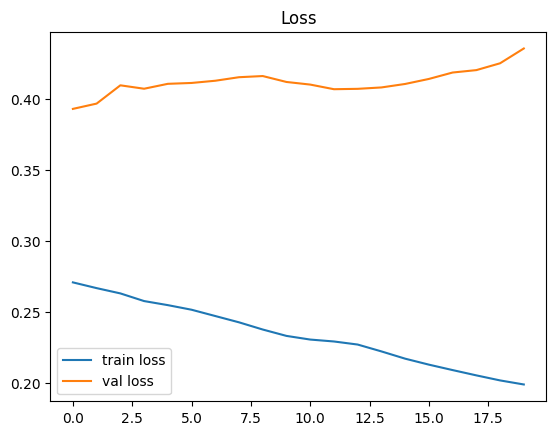

In [55]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# 로지스틱 회귀 모델 학습 (max_iter 늘리고, solver 변경)
model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8525


In [60]:
# 하이퍼파라미터 튜닝: 'solver'와 'penalty' 조건을 맞추기 위해 필터링
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']}, {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}]

# GridSearchCV로 최적화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['l2'], 'solver': ['lbfgs']}],
             scoring='accuracy')

In [62]:
#하이퍼 파라미터 튜닝 후 정확도
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 정확도:", grid_search.best_score_)
tuned_model = grid_search.best_estimator_
print("튜닝 후 정확도:", accuracy_score(y_test, tuned_model.predict(X_test_scaled)))

최적 하이퍼파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
최고 정확도: 0.8221088435374149
튜닝 후 정확도: 0.8524590163934426


In [64]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#튜닝 후
y_pred_tuned = tuned_model.predict(X_test_scaled)
print("Confusion Matrix (튜닝 후):")
print(confusion_matrix(y_test, y_pred_tuned))

Confusion Matrix:
[[25  4]
 [ 5 27]]
Confusion Matrix (튜닝 후):
[[25  4]
 [ 5 27]]


In [66]:
#딥러닝 정의
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'), Dense(32, activation='relu'), Dense(2, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
# 딥러닝 학습
model.fit(X_train_scaled, y_train_encoded,
          epochs=20, batch_size=32, validation_split=0.2)

# 테스트 평가
loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
print(f"Test Accuracy (딥러닝): {acc:.4f}")

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5188 - loss: 0.7846 - val_accuracy: 0.6735 - val_loss: 0.6065
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.5951 - val_accuracy: 0.7755 - val_loss: 0.5379
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.5404 - val_accuracy: 0.7959 - val_loss: 0.4957
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.5136 - val_accuracy: 0.8367 - val_loss: 0.4684
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7706 - loss: 0.4587 - val_accuracy: 0.7755 - val_loss: 0.4489
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.4405 - val_accuracy: 0.7755 - val_loss: 0.4350
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4133 - val_accuracy: 0.7755 - val_loss: 0.4274
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8110 - loss: 0.4166 - val_accuracy: 0.7959 - val_loss: 0.4200
Epoch 9/

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9024 - loss: 0.2796 - val_accuracy: 0.7755 - val_loss: 0.4046
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3087 - val_accuracy: 0.7755 - val_loss: 0.4072
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9048 - loss: 0.2533 - val_accuracy: 0.7551 - val_loss: 0.4119
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - loss: 0.2558 - val_accuracy: 0.7551 - val_loss: 0.4137
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8958 - loss: 0.2756 - val_accuracy: 0.7551 - val_loss: 0.4203
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8983 - loss: 0.2606 - val_accuracy: 0.7755 - val_loss: 0.4294
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9069 - loss: 0.2599 - val_accuracy: 0.7755 - val_loss: 0.4232
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8995 - loss: 0.2811 - val_accuracy: 0.7551 - val_loss: 0.4188
Epoch 9/

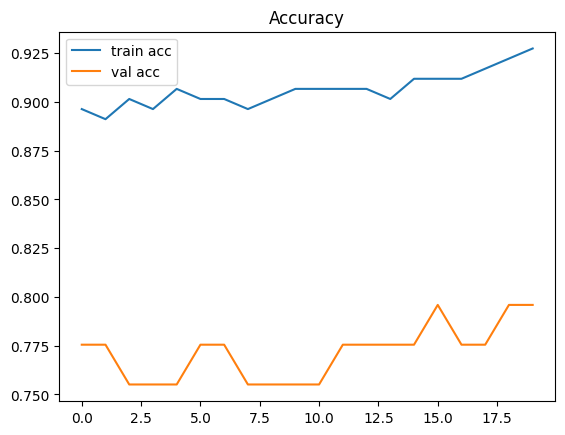

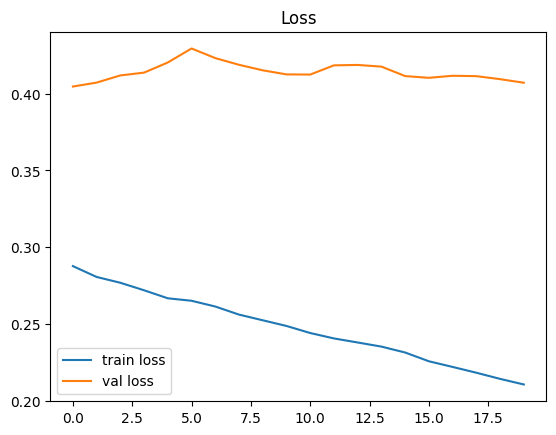

In [70]:
#성능 시각화
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)
# 정확도
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# 손실
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()